# Stochastic Gradient Descent

In [1]:
#Import data
from sklearn.datasets.mldata import fetch_mldata
mnist = fetch_mldata('mnist-original', data_home='./MNIST')

In [2]:
#Convert it to what we want to predict
for i in range(len(mnist.target)):
	if(mnist.target[i]) == 5:
		mnist.target[i] = 1
	else:
		mnist.target[i] = 0

In [3]:
#Normalize data
from sklearn.preprocessing import normalize
mnist.data = normalize(mnist.data)

In [4]:
#Divide into Train/Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.10, random_state=0)

In [5]:
#Make array of fives (used in training process)
fiveDataset = {"data":[], "target":[]}
for i in range(len(y_train)):
	if(y_train[i]) == 1:
		fiveDataset["data"].append(x_train[i])
		fiveDataset["target"].append(y_train[i])

In [6]:
# Load neural net or create it
from pathlib import Path 
import pickle
from bnetwork import Network
filename = "./neuralNetworkBGD.pkl"
neuralNetFile = Path(filename)
n = None
if neuralNetFile.is_file():
	with open(filename, "rb") as inputF:
		n = pickle.load(inputF)
		# print("loading previous net with weights ", n.weights)
		print("Loading previous net with NIterations", n.NIterations)
else:
	n = Network([1, 10, 30, 300, 300, 300, 784])


In [7]:
# Set batch size and number of batches
batchSize = 50
numberOfBatches = 20

In [18]:
#Train
import random
for batch in range(numberOfBatches):
	for i in range(batchSize):
		j = None
		objective = None
		result = None

		if(random.random() >=0.7):
			j = random.randint(0, len(fiveDataset["target"])-1)
			objective = fiveDataset["target"][j]

			result = n.feedForward(fiveDataset["data"][j])[0]
		else:
			j = random.randint(0, len(x_train) - 1)
			objective = y_train[j]

			result = n.feedForward(x_train[j])[0]

		n.backPropagate(result, [objective])
	n.updateWeights()

[6284  276  440]
Correct 0.8977142857142857
False positives 0.06285714285714286
False negatives 0.03942857142857143
Total 7000


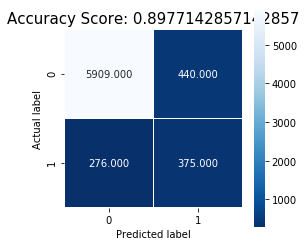

In [17]:
#Test code
import numpy as np 
stats = np.array([0,0,0])

# Matriz de confusion
yResults = []
predictedResults = []


for j in range(len(x_test)):

	objective = y_test[j]

	result = n.feedForward(x_test[j])
	tempResult = result[0]

	if(tempResult >= 0.5):
		tempResult = 1.0
	else:
		tempResult = 0.0

	yResults.append(y_test[j])
	predictedResults.append(tempResult)
	stats[int(objective) - int(tempResult)] += 1

# Display results
print(stats)

print("Correct {}".format(stats[0]/sum(stats)))
print("False positives {}".format(stats[-1]/sum(stats)))
print("False negatives {}".format(stats[1]/sum(stats)))
print("Total", sum(stats))

# Plot confusion matrix
score = stats[0]/sum(stats) #correctas / totales
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(yResults, predictedResults)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

In [10]:
#Display stats
print("Iterations: ", n.NIterations)
print("Updates: ", n.updates)

Iterations:  1000
Updates:  20


In [11]:
#Save network
with open(filename, "wb") as output:
	pickle.dump(n, output, pickle.HIGHEST_PROTOCOL)